In [1]:
%load_ext autoreload
%autoreload 2

'''

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from mres import wv_pipeline, plot_fixed_results, plot_against_tau, calculate_fgammas, bvs_interaction_picture, prepare_params

ModuleNotFoundError: No module named 'mres'

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
generator = np.random.default_rng()

In [74]:
params = {
    'omega_as': None,
    'omega_a_0': None,
    'omega_f': 1,
    'g': 1,
    'i': np.array([0,0,1]),
    'f': np.array([-1,0,0]),
    'm': np.array([1,-1j,0])/2,
    't': None,
    'tau': 0,
    'gamma': 0,
    'm_to_int': False,
    'a': 0,
    'b': 1,
    'rwa': False
}

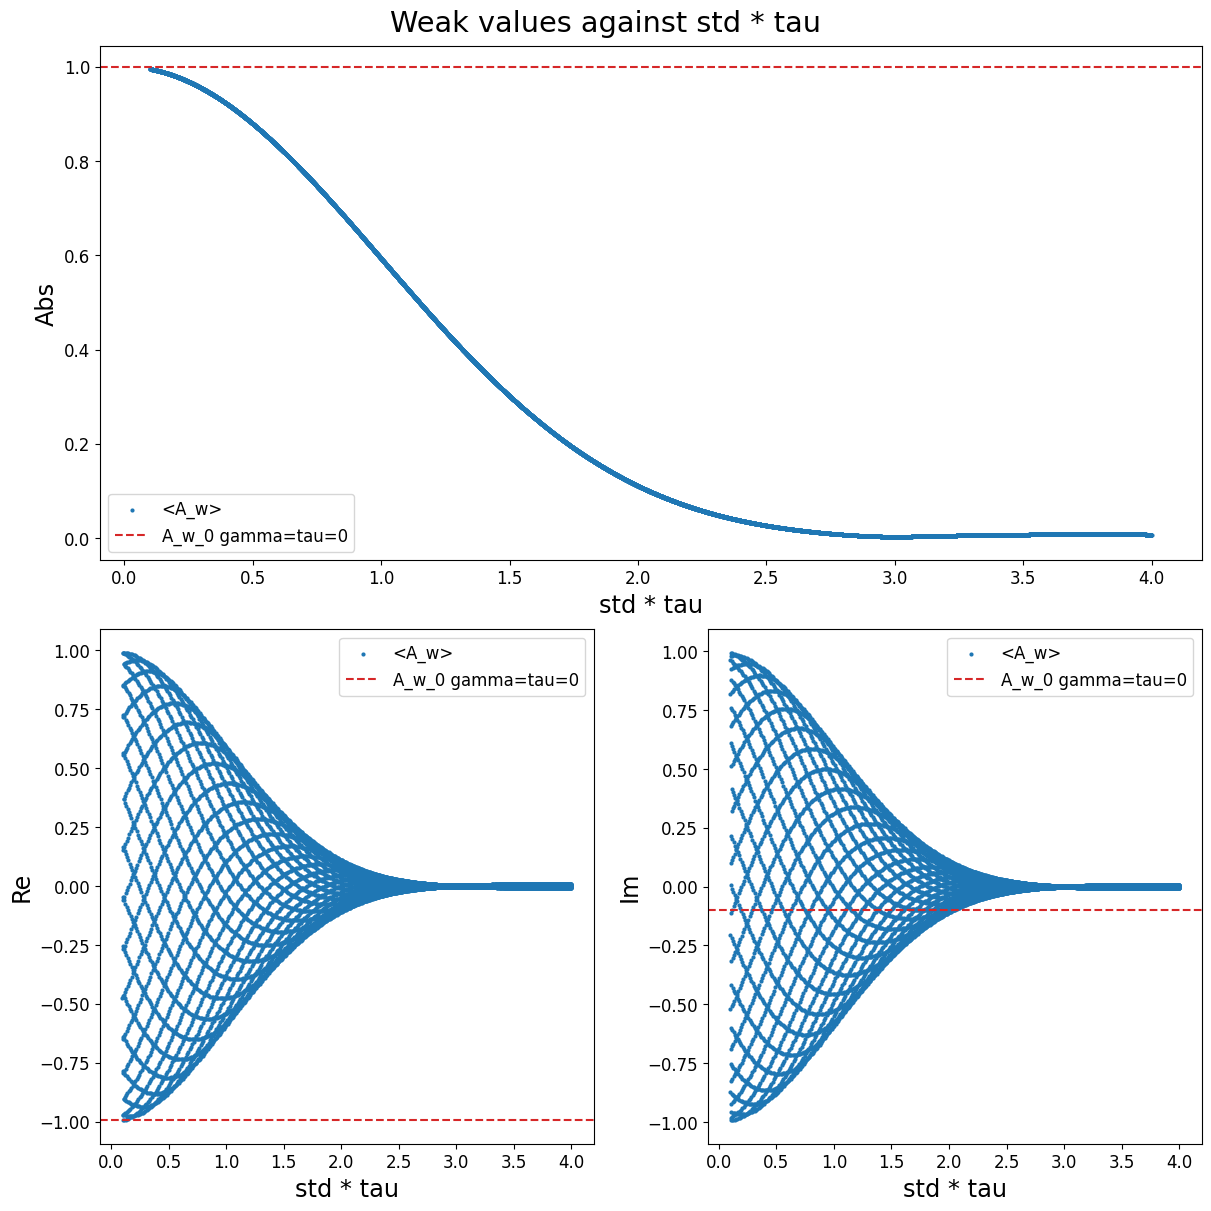

In [75]:
# Gaussian disorder, omega_a >> std, 4/std >= tau >= 0.1/std >> t
omega_a_samples = np.int64(5e3)
tau_samples = np.int64(1e4)

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.linspace(1e-1/omega_a_std, 4/omega_a_std, tau_samples)
params['gamma'] = 1e-1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, False)
plot_against_tau(results)

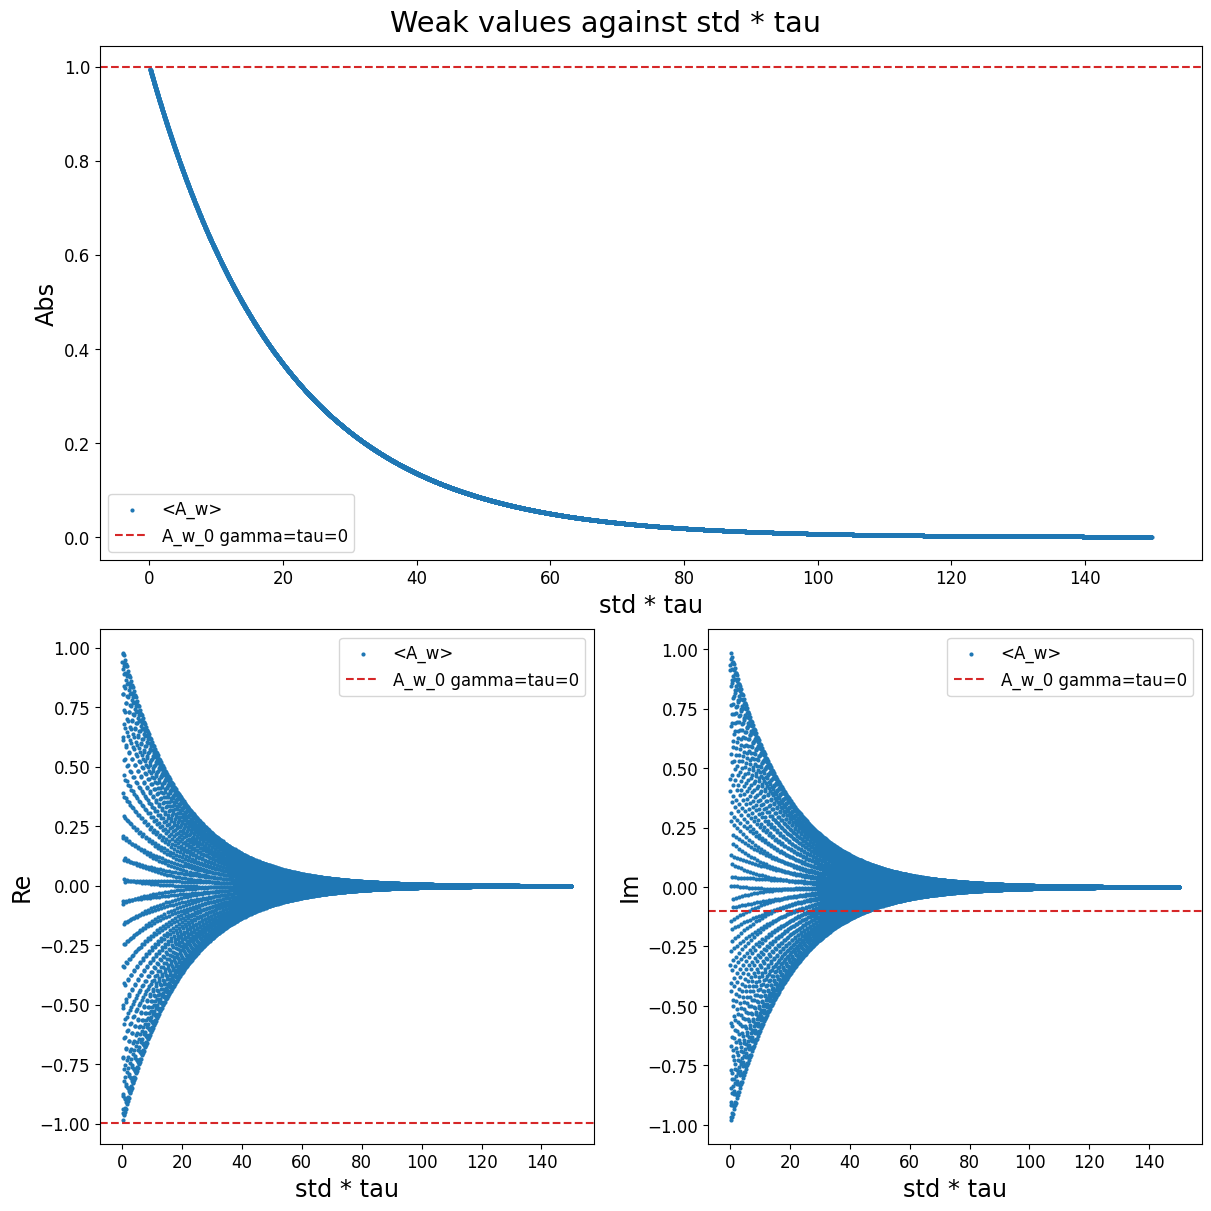

In [76]:
# No disorder, plot against tau
#omega_a_samples = np.int64(1e7)
tau_samples = np.int64(1e4)

omega_a_mean = 1e8
omega_a_std = 1

params['omega_as'] = omega_a_mean
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.linspace(1e-1, 1.5e2, tau_samples)
params['gamma'] = 1e-1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, True)

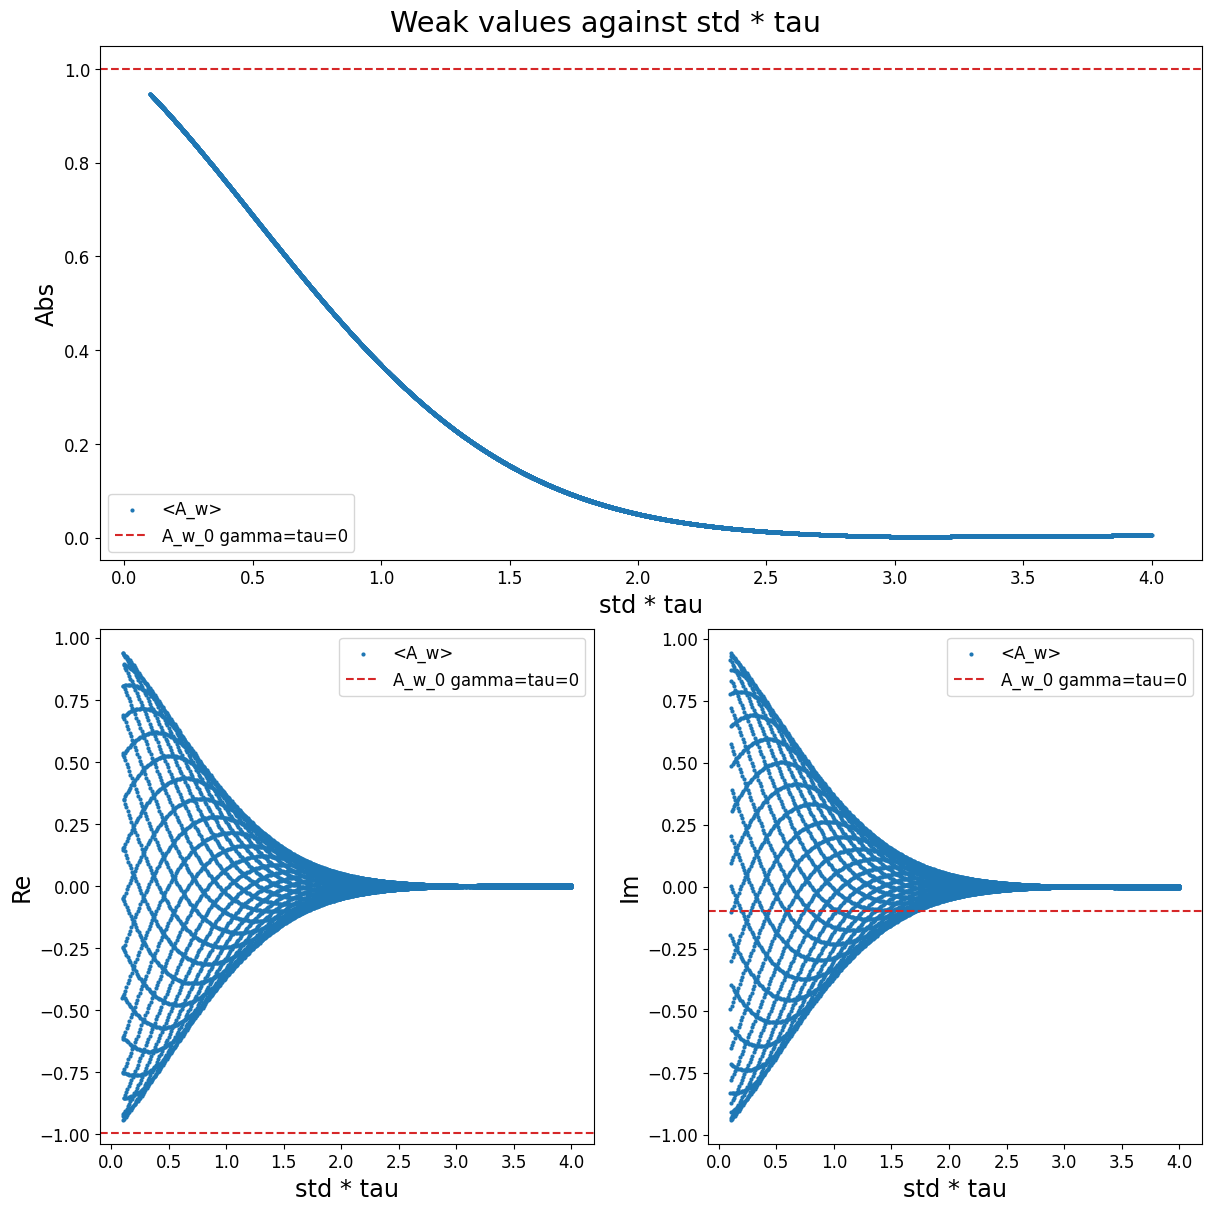

In [77]:
# Gaussian disorder, omega_a >> std, 1e-1/std >= tau >= 1e-4/std >> t, huge gamma
omega_a_samples = np.int64(5e3)
tau_samples = np.int64(1e4)

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.linspace(0.1/omega_a_std, 4/omega_a_std, tau_samples)
params['gamma'] = 1e4
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, True)

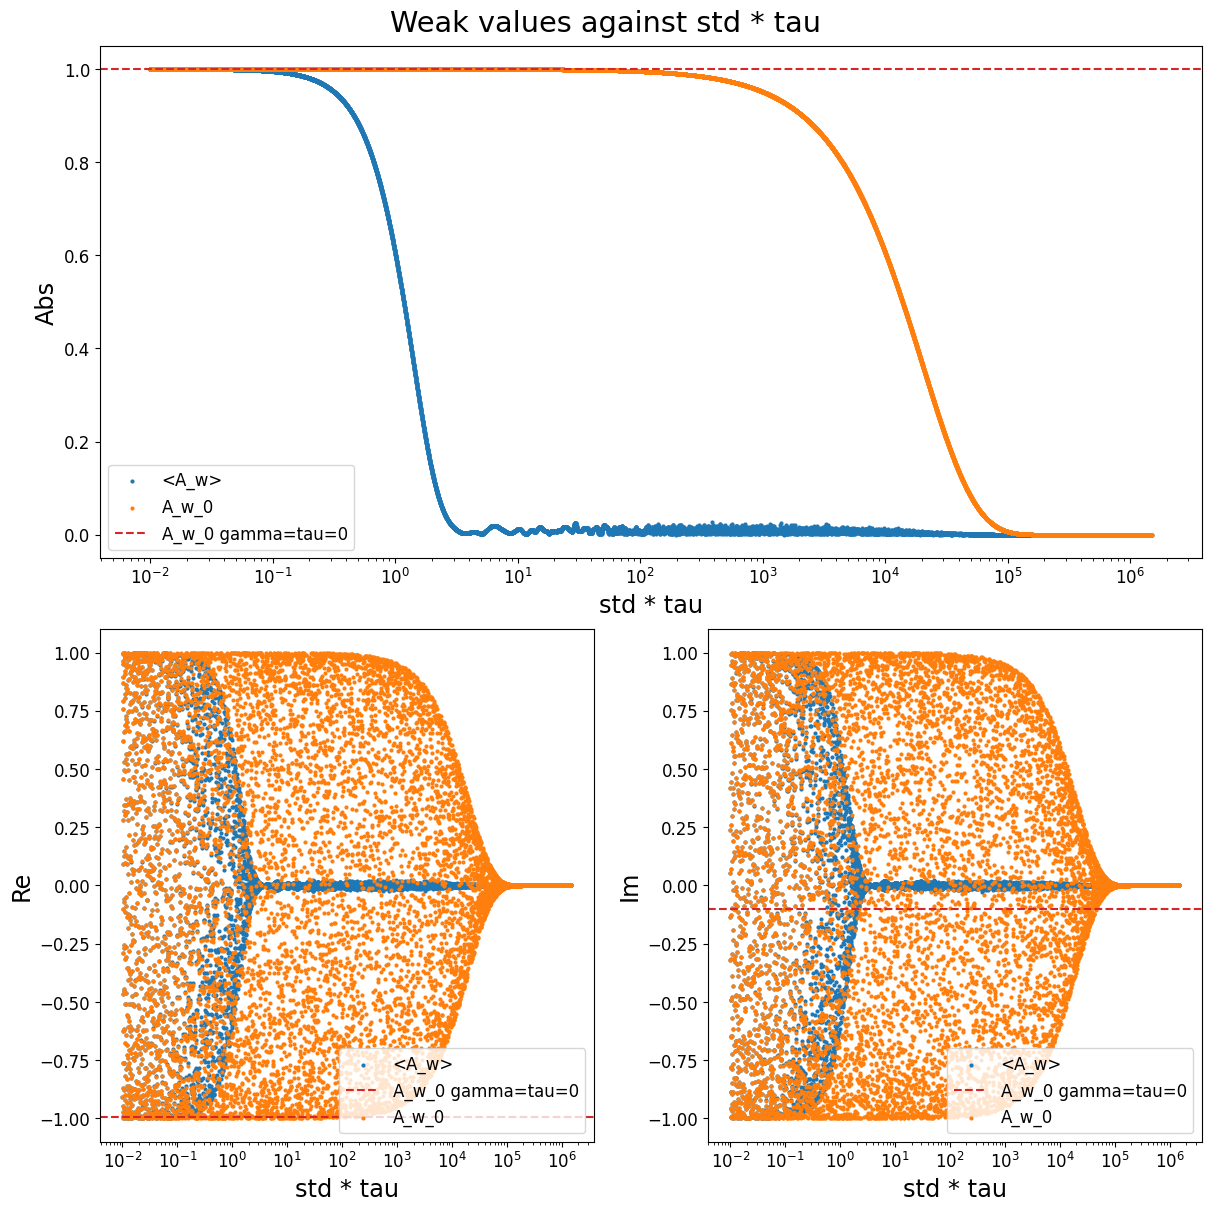

In [79]:
# Gaussian disorder, omega_a >> std, tau -> inf, log scale
omega_a_samples = np.int64(1e4)
tau_samples = np.int64(1e4)

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.geomspace(1e-6, 1.5e2, tau_samples)
params['gamma'] = 1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, True, True, True)

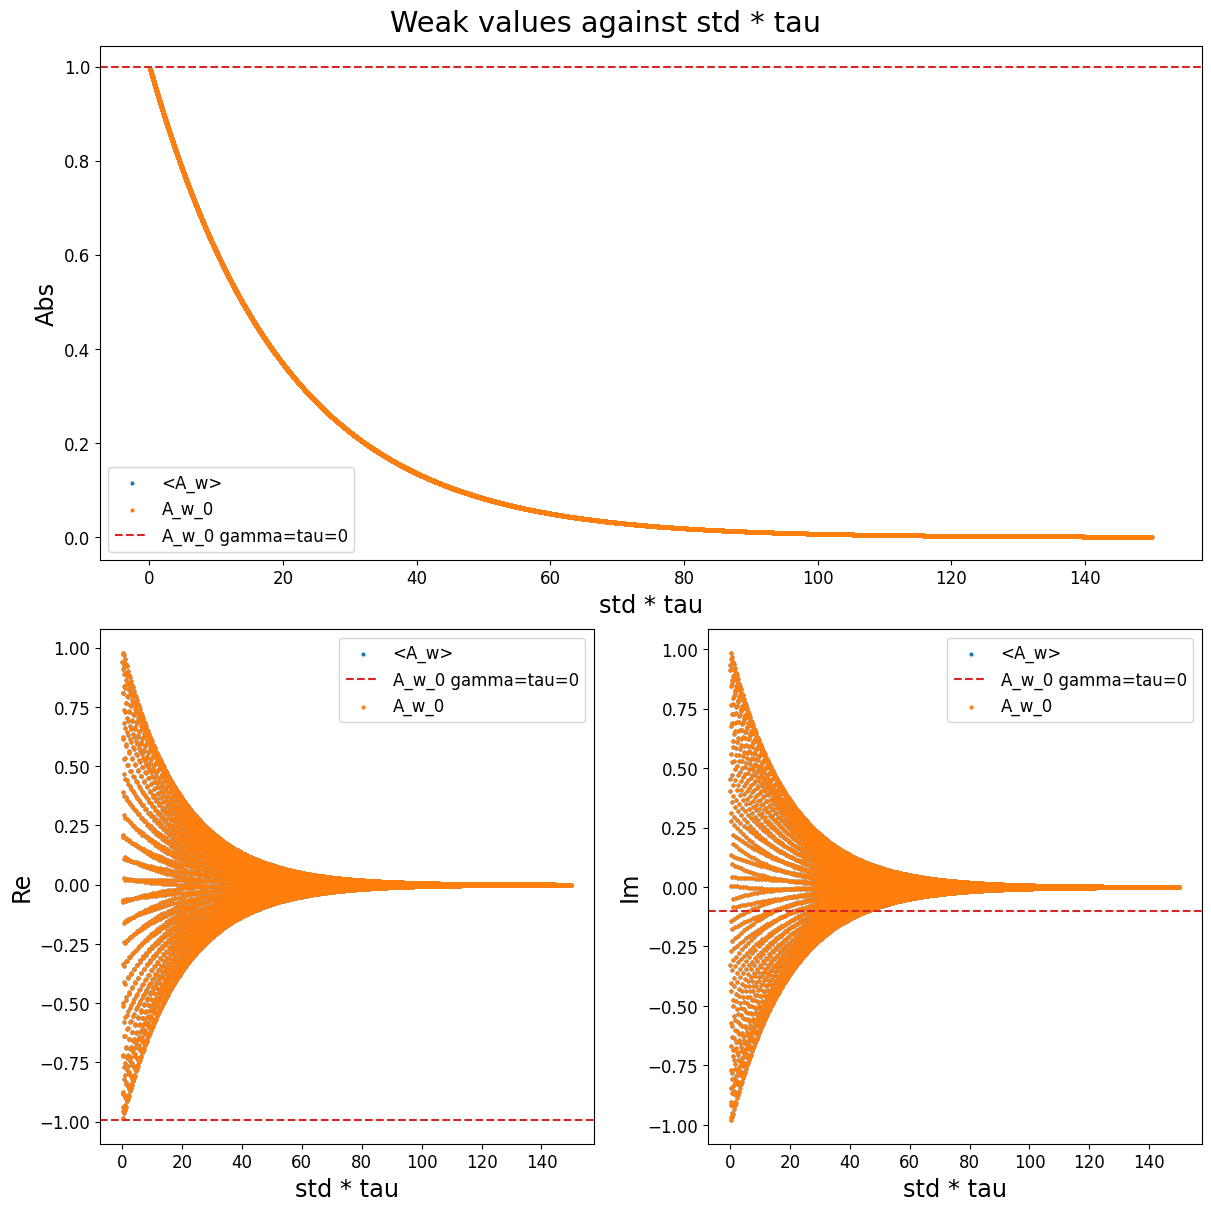

In [80]:
# No disorder, plot against tau
#omega_a_samples = np.int64(1e7)
tau_samples = np.int64(1e4)

omega_a_mean = 1e8
omega_a_std = 1

params['omega_as'] = omega_a_mean
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.linspace(1e-1, 1.5e2, tau_samples)
params['gamma'] = 1e-1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, True, True)

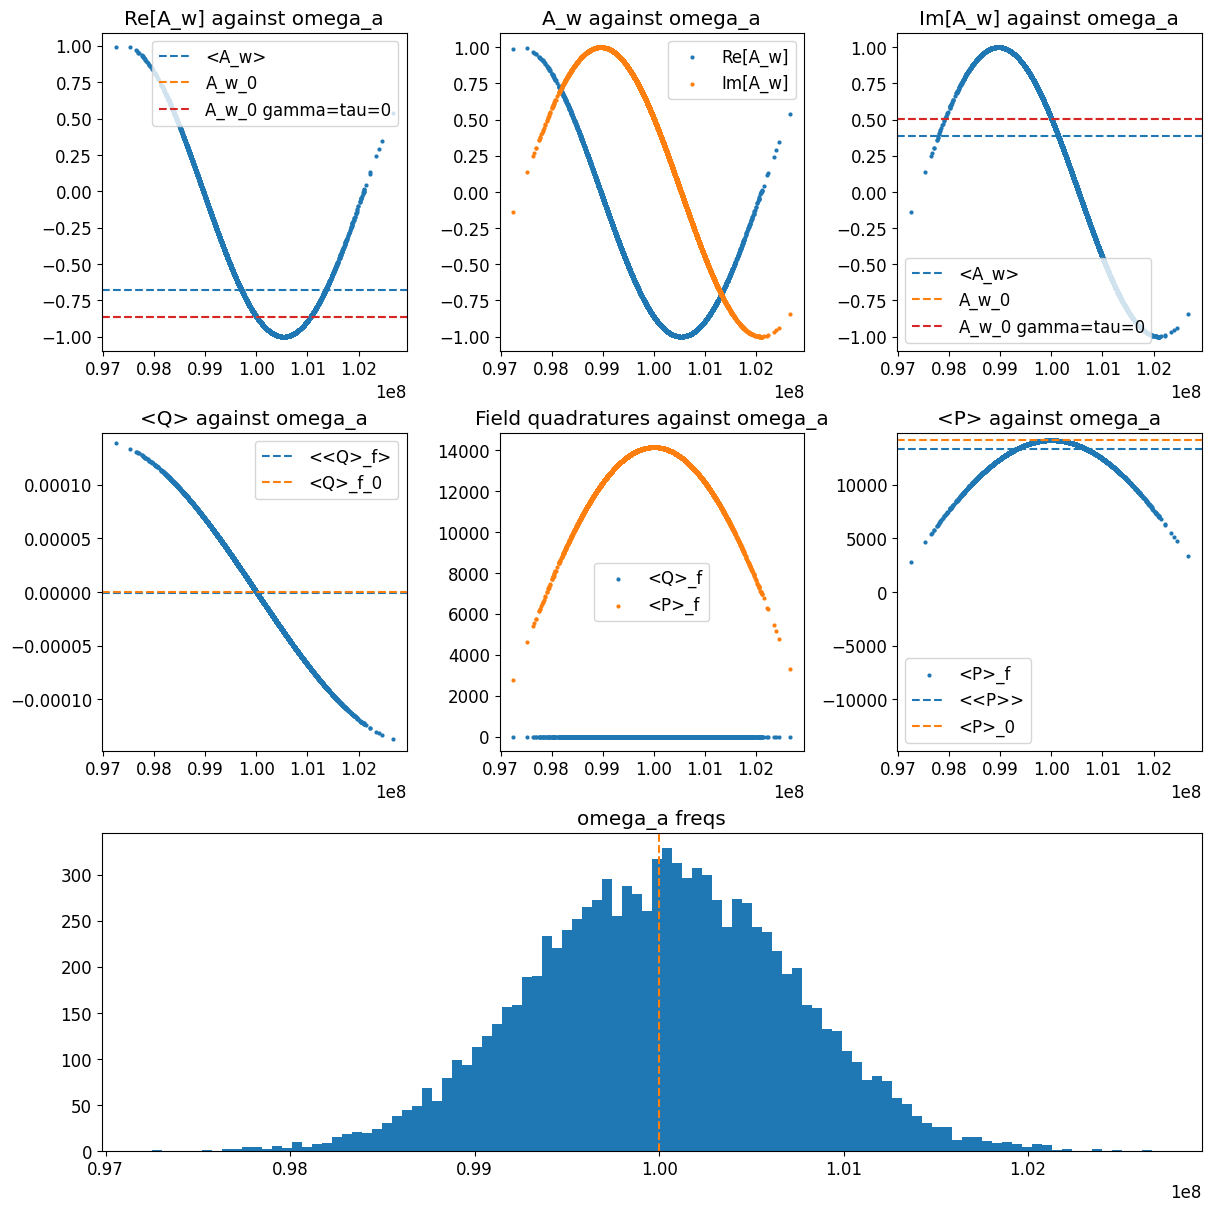

In [82]:
# Gaussian disorder, tau=0

samples = 10000
omega_a_mean = 1e8
omega_a_std = 7e5

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, samples)
params['omega_a_0'] = omega_a_mean
params['t'] = 1e-6
params['tau'] = 0
params['gamma'] = 0
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params)
plot_fixed_results(results)

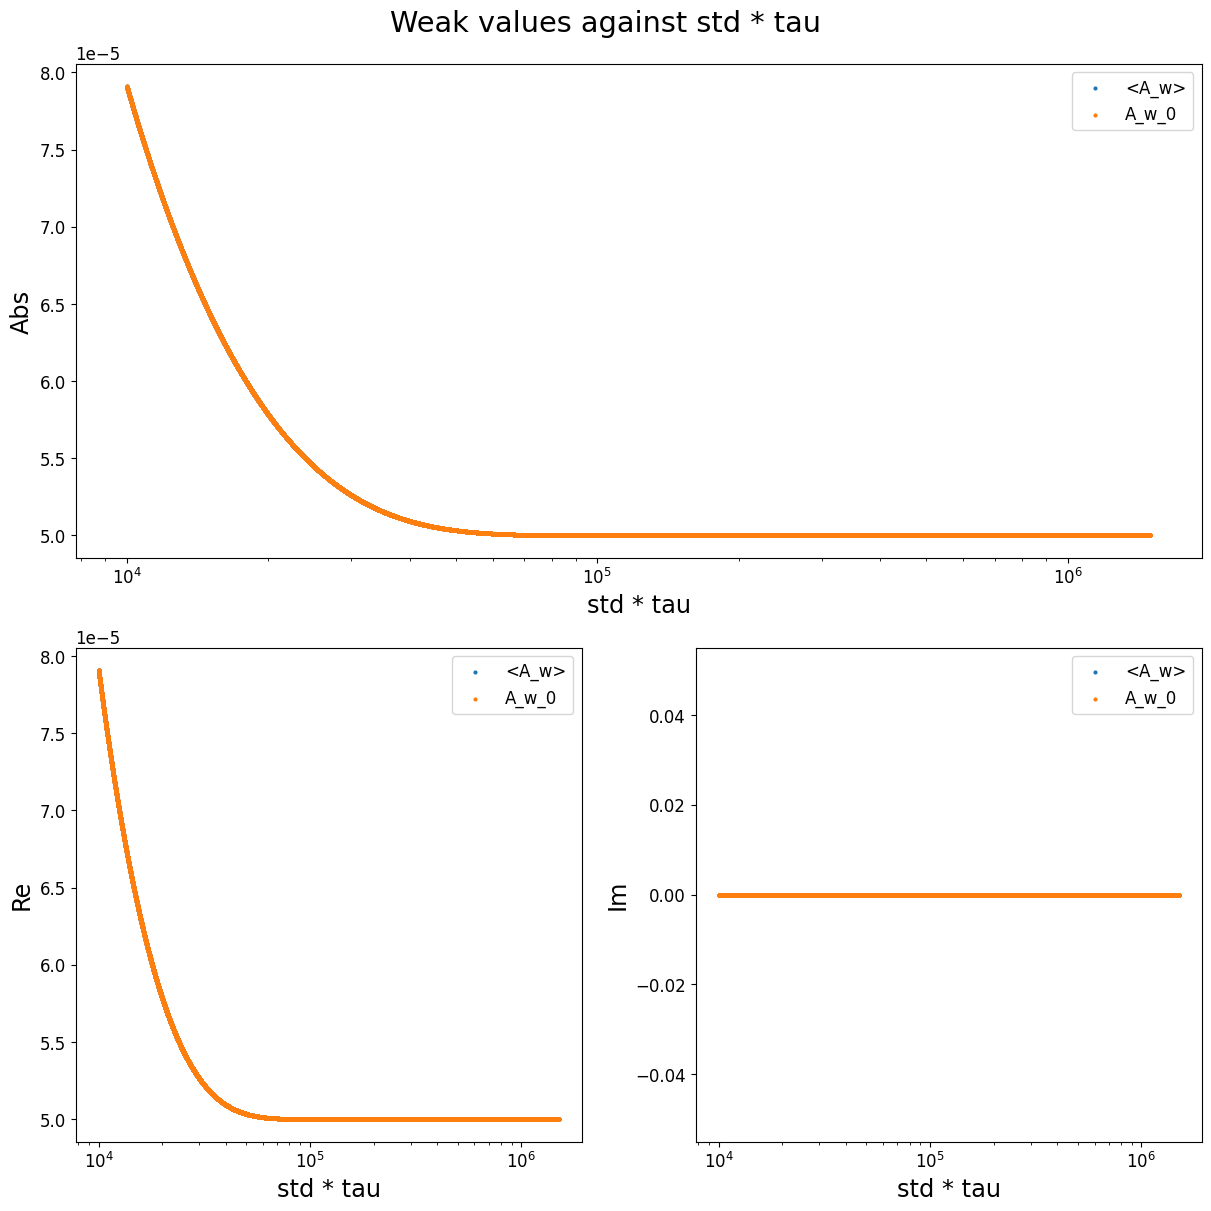

In [84]:
# Gaussian disorder, big WV, omega_a >> std, tau -> inf, log scale
omega_a_samples = np.int64(1e4)
tau_samples = np.int64(1e4)

delta = 1e-4
params['i'] = np.array([np.sin(delta), 0,np.cos(delta)])
params['f'] = np.array([0,0,-1])

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.geomspace(1, 1.5e2, tau_samples)
params['gamma'] = 1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, False, True, True)

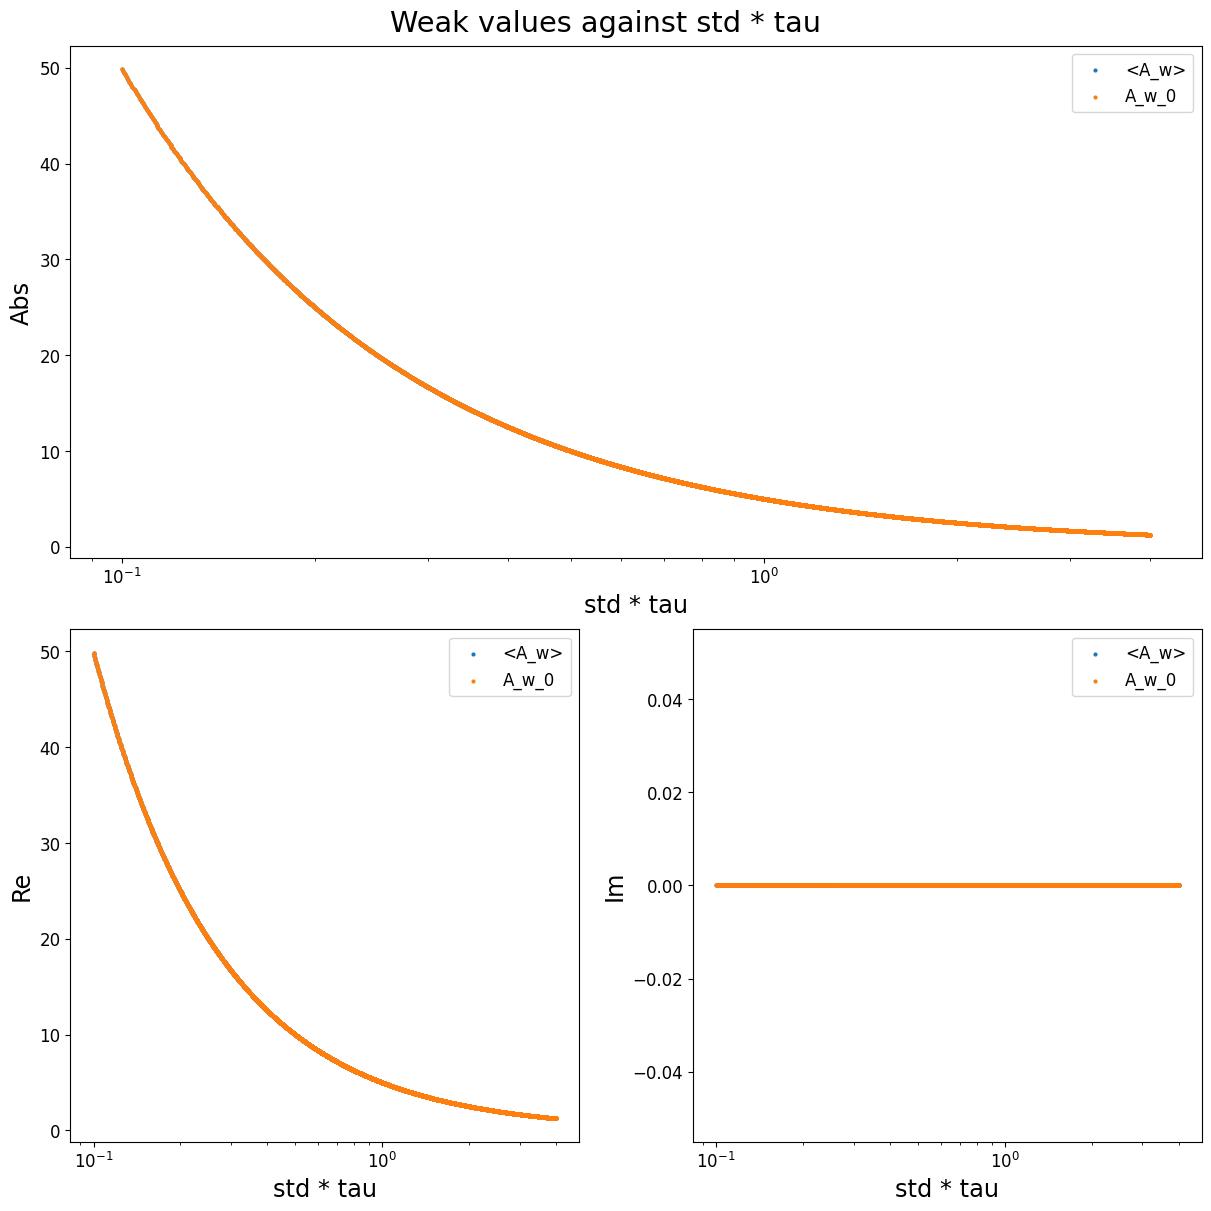

In [85]:
# Gaussian disorder, big WV omega_a >> std, 4/std >= tau >= 0.1/std >> t
omega_a_samples = np.int64(5e3)
tau_samples = np.int64(1e4)

delta = 1e-4
params['i'] = np.array([np.sin(delta), 0, np.cos(delta)])
params['f'] = np.array([0,0,-1])

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.linspace(1e-1/omega_a_std, 4/omega_a_std, tau_samples)
params['gamma'] = 1e-1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, False, True, True)

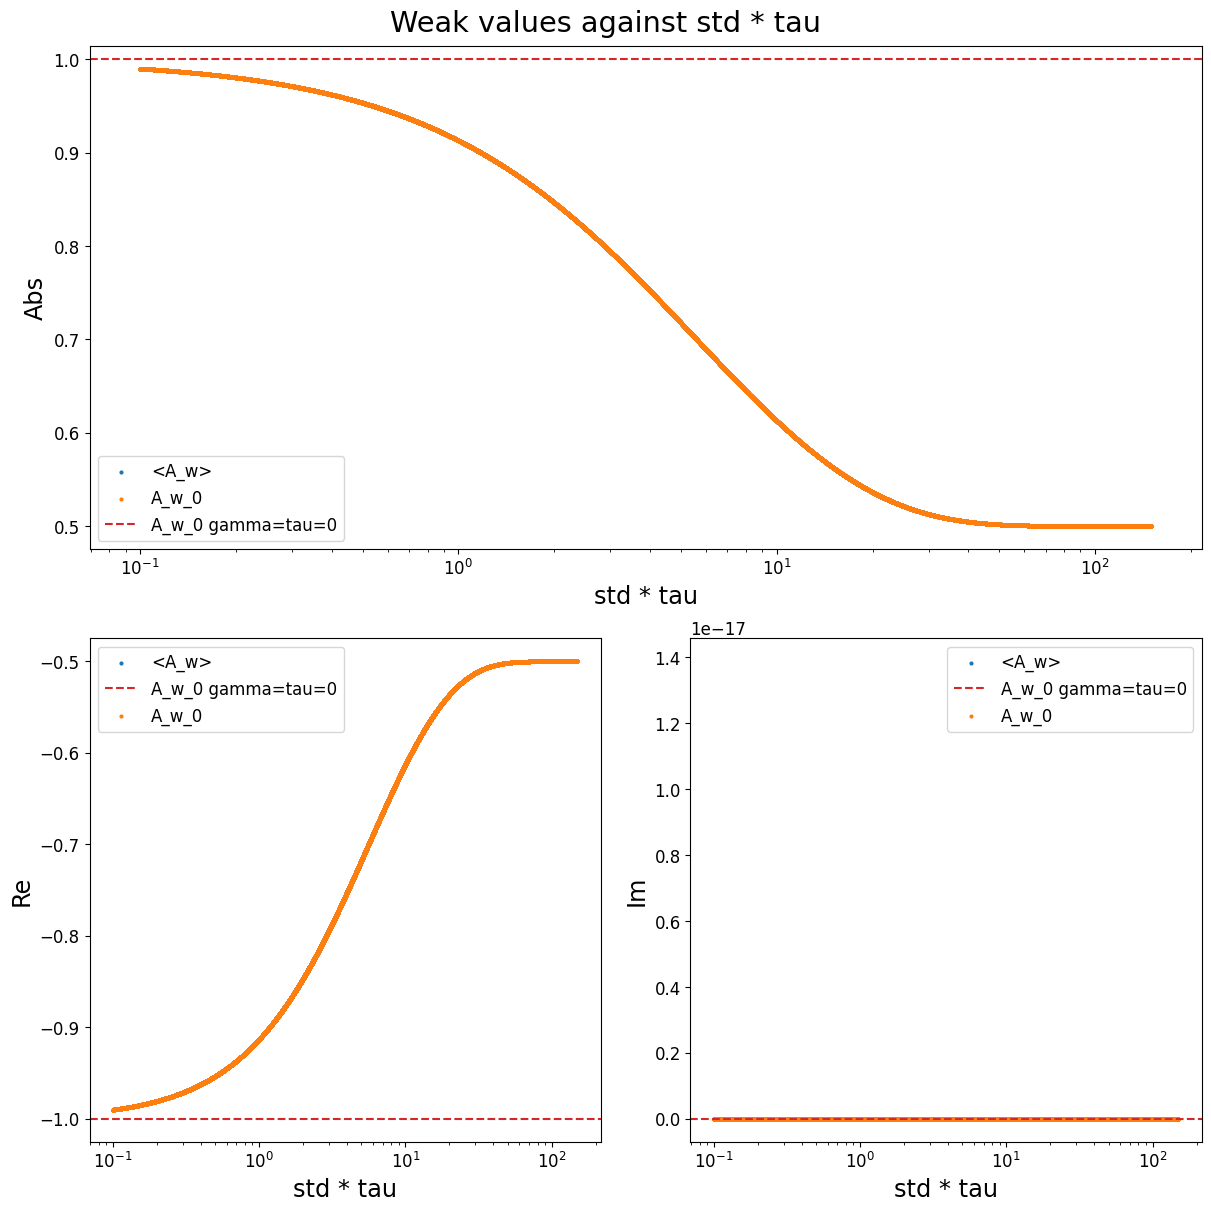

In [89]:
# No disorder, plot against tau, neg wv
#omega_a_samples = np.int64(1e7)
tau_samples = np.int64(1e4)

params['i'] = np.array([-1, 0, 0])
params['f'] = np.array([0,0,-1])

omega_a_mean = 1e8
omega_a_std = 1

params['omega_as'] = omega_a_mean
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.geomspace(1e-1, 1.5e2, tau_samples)
params['gamma'] = 1e-1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6

results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, True, True, True)

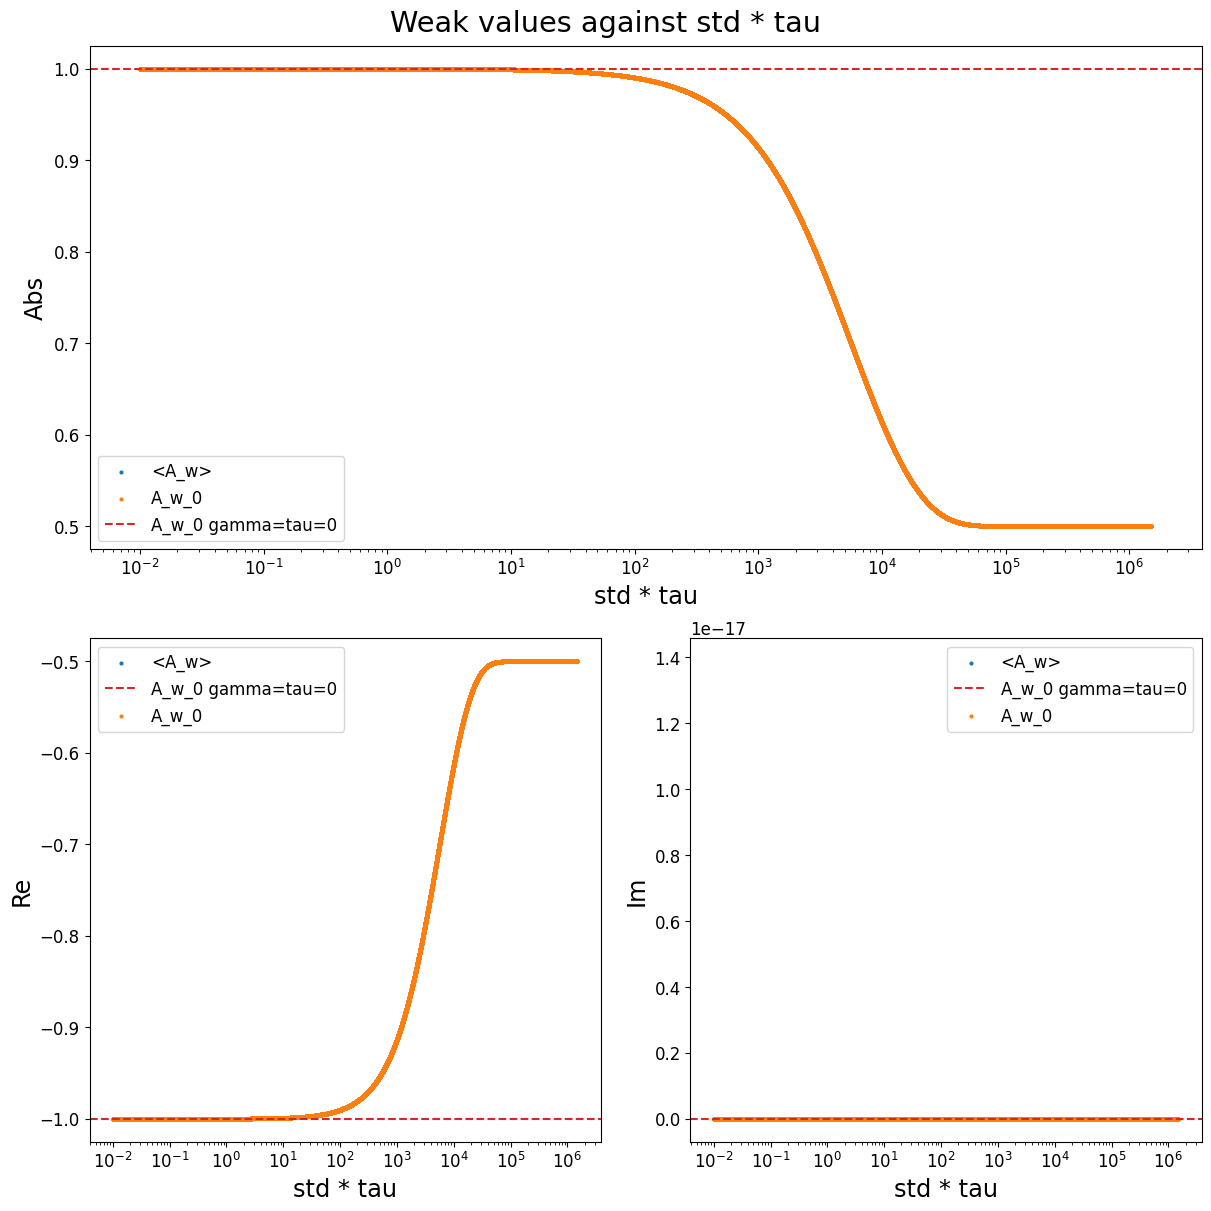

In [87]:
# Gaussian disorder, neg WV, omega_a >> std, 4/std >= tau >= 0.1/std >> t
omega_a_samples = np.int64(1e4)
tau_samples = np.int64(1e4)

params['i'] = np.array([-1, 0, 0])
params['f'] = np.array([0,0,-1])

omega_a_mean = 1e8
omega_a_std = 1e4

params['omega_as'] = generator.normal(omega_a_mean, omega_a_std, omega_a_samples)
params['omega_a_0'] = omega_a_mean
params['omega_a_std'] = omega_a_std
params['t'] = 1e-9
params['tau'] = np.geomspace(1e-6, 1.5e2, tau_samples)
params['gamma'] = 1
params['omega_f'] = 9.9999999e7
params['g'] = 1e6


results = wv_pipeline(params, field_quads=False)
plot_against_tau(results, True, True, True)